In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For reproducibility
np.random.seed(42)

# Generate sample data for 3 clusters
cluster_1 = {
    'Age': np.random.randint(18, 25, 50),
    'Salary': np.random.randint(15000, 30000, 50)
}

cluster_2 = {
    'Age': np.random.randint(30, 40, 50),
    'Salary': np.random.randint(40000, 60000, 50)
}

cluster_3 = {
    'Age': np.random.randint(45, 60, 50),
    'Salary': np.random.randint(65000, 90000, 50)
}

# Combine into a single DataFrame
df1 = pd.DataFrame(cluster_1)
df2 = pd.DataFrame(cluster_2)
df3 = pd.DataFrame(cluster_3)
df = pd.concat([df1, df2, df3]).reset_index(drop=True)

# # Scale the data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Apply KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['Cluster'] = kmeans.fit_predict(df_scaled)

# # Plot each cluster with label
# plt.figure(figsize=(8, 6))
# for cluster_id in sorted(df['Cluster'].unique()):
#     cluster_data = df[df['Cluster'] == cluster_id]
#     plt.scatter(cluster_data['Age'], cluster_data['Salary'], label=f'Cluster {cluster_id}', s=50)

# plt.xlabel('Age')
# plt.ylabel('Salary')
# plt.title('K-Means Clustering of Age vs Salary')
# plt.legend(title='Cluster Group')
# plt.grid(True)
# plt.show()


In [89]:
df

,Age,Salary
0,24,18556
1,21,18890
2,22,23838
3,24,29356
4,20,26080
...,...,...
145,56,83639
146,55,66154
147,50,69499
148,57,71295


In [90]:
import matplotlib.pyplot as plt

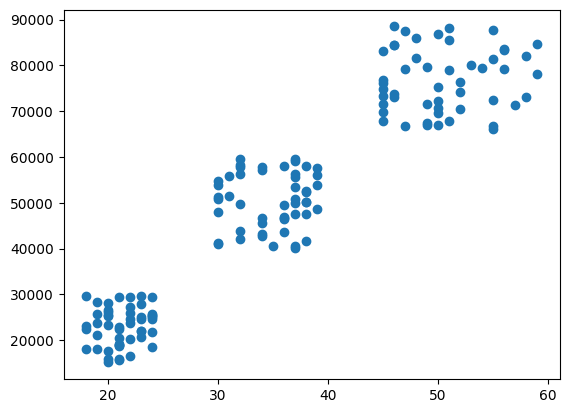

In [91]:
plt.scatter(x=df.Age,y=df.Salary)

In [92]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)
wcss

[76883978285.53333,
 19175604584.741817,
 4927294329.2,
 3146167505.3761997,
 1845555301.3361998,
 1245642630.9583642,
 1271750232.8556163,
 845924337.5143888,
 626591811.4983406,
 450792457.80019146]

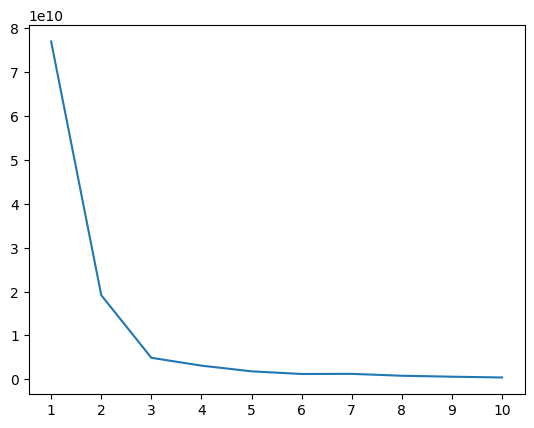

76883978285.53333


In [93]:

list = [1,2,3,4,5,6,7,8,9,10]
plt.plot(list,wcss)
plt.xticks(range(1,11))
plt.show()

print((7.688397828553333)*(10**10))

In [94]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [95]:
df['Cluster'] = model.predict(df)
df

,Age,Salary,Cluster
0,24,18556,1
1,21,18890,1
2,22,23838,1
3,24,29356,1
4,20,26080,1
...,...,...,...
145,56,83639,0
146,55,66154,0
147,50,69499,0
148,57,71295,0


In [96]:
df['Cluster'].unique()

array([1, 2, 0])

In [97]:
model.predict([[37,40000]])

c:\Users\Jash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [98]:
# for cluster_id in sorted(df['Cluster'].unique()):
#     cluster_data = df[df['Cluster'] == cluster_id]
#     plt.scatter(cluster_data['Age'], cluster_data['Salary'], label=f'Cluster {cluster_id}')
    
# plt.legend()

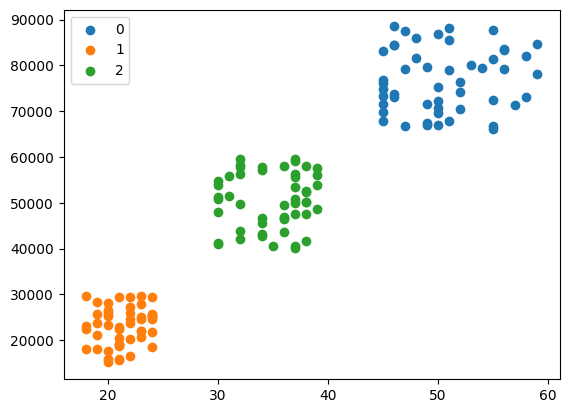

In [99]:
for cluster_id in sorted(df['Cluster'].unique()):
    clustedData = df[df['Cluster'] == cluster_id ]
    plt.scatter(clustedData['Age'],clustedData['Salary'], label = cluster_id)
plt.legend()
plt.show()

In [100]:
zero = 'High Class'
one = 'Low Class'
two = 'Middle Class'

def sectionOfSociety(cluster):
    if cluster == 0:
        return zero
    elif cluster == 1:
        return one
    elif cluster == 2:
        return two
    else:
        return None

df['Catergory'] = df.Cluster.apply(lambda x: sectionOfSociety(x))
df

,Age,Salary,Cluster,Catergory
0,24,18556,1,Low Class
1,21,18890,1,Low Class
2,22,23838,1,Low Class
3,24,29356,1,Low Class
4,20,26080,1,Low Class
...,...,...,...,...
145,56,83639,0,High Class
146,55,66154,0,High Class
147,50,69499,0,High Class
148,57,71295,0,High Class


In [101]:
df[df['Catergory'] == 'Middle Class'].shape

(50, 4)

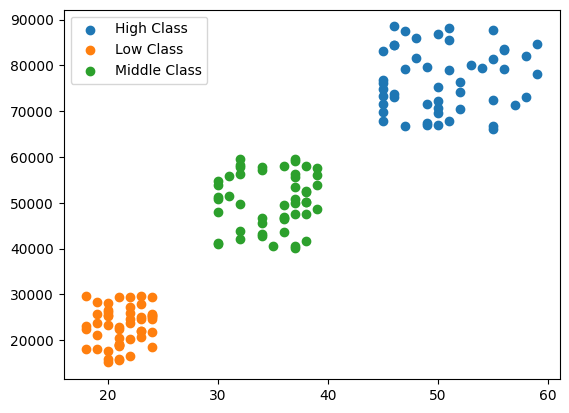

In [102]:
for catergory in sorted(df['Catergory'].unique()):
    catergoryData = df[df['Catergory'] == catergory ]
    plt.scatter(catergoryData['Age'],catergoryData['Salary'], label = catergory)
plt.legend()
plt.show()